### 1.Data Exploration

In [485]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix,f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import LabelEncoder

#### a)loading the dataset

In [6]:
train=pd.read_csv('Titanic_train.csv')
test=pd.read_csv('Titanic_test.csv')

#### b. Examine Features and Summary Statistics

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.shape #to know no of rows and no of columns

(891, 12)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### c. Visualizations
we can create various visualizations to analyze the distributions and relationships between features. Below are some examples using matplotlib and seaborn.



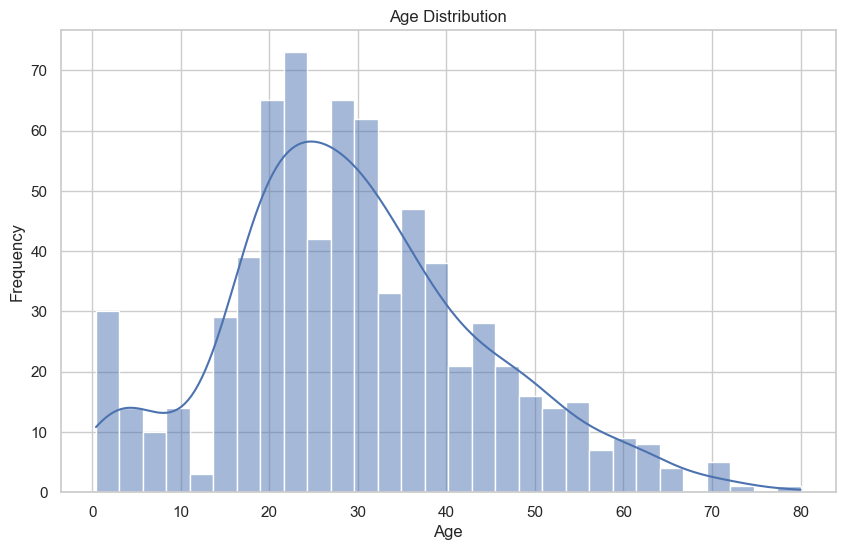

In [16]:
import matplotlib.pyplot as plt #visualization libraries
import seaborn as sns

sns.set(style="whitegrid")

# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

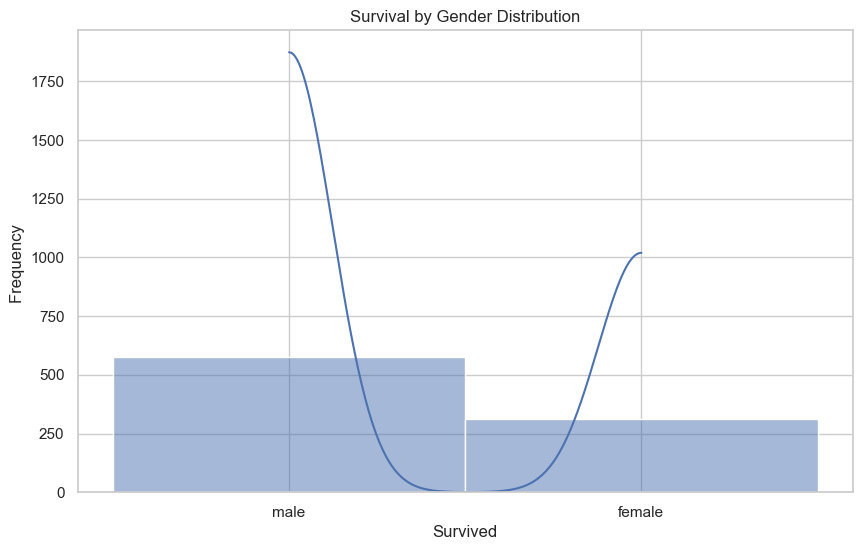

In [178]:
import matplotlib.pyplot as plt #visualization libraries
import seaborn as sns

sns.set(style="whitegrid")

# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(train['Sex'], bins=30, kde=True)
plt.title('Survival by Gender Distribution')
plt.xlabel('Survived')
plt.ylabel('Frequency ')
plt.show()

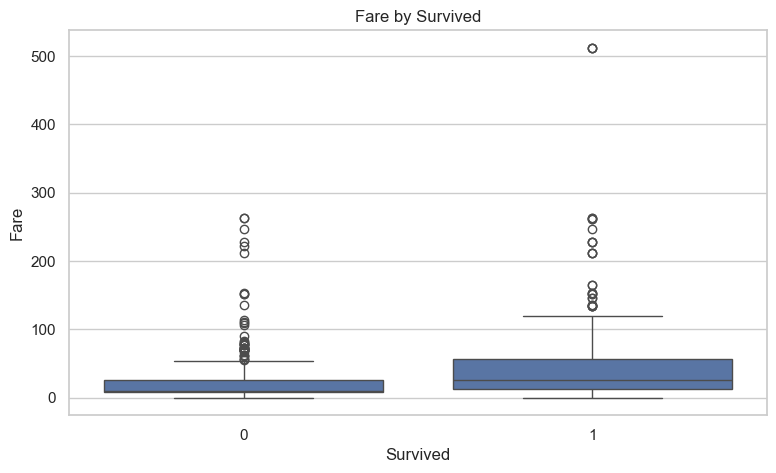

In [172]:
# Box Plot of Fare by Survival
plt.figure(figsize=(9, 5))
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title('Box Plot of Fare by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Fare by Survived') 
plt.show()

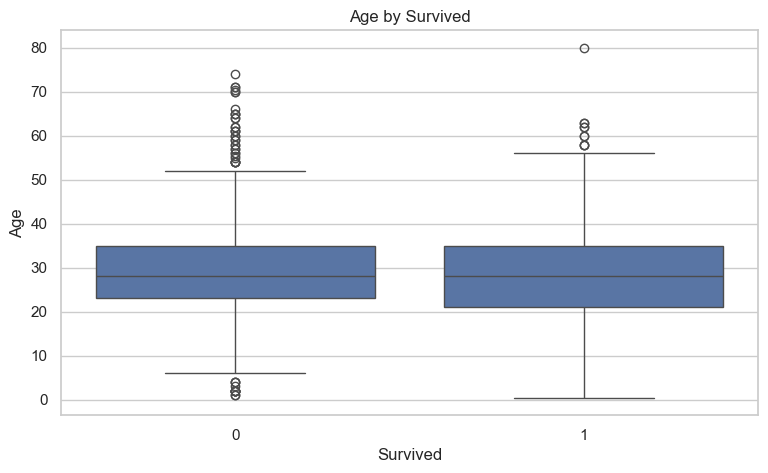

In [174]:
# Box Plot of Fare by Survival
plt.figure(figsize=(9, 5))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Box Plot of Fare by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Age by Survived') 
plt.show()

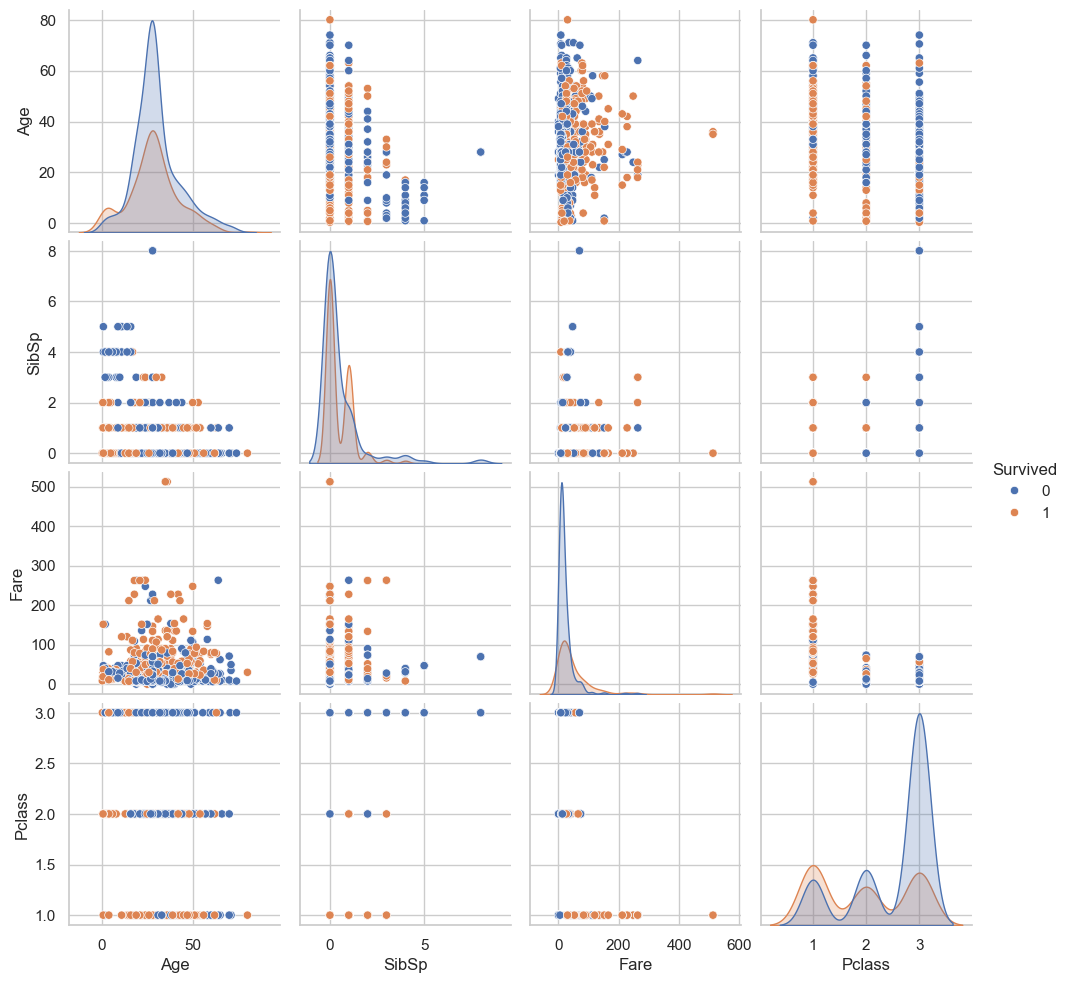

In [194]:
# Pair Plot visualization
sns.pairplot(train, hue='Survived', vars=['Age','SibSp', 'Fare', 'Pclass'])
plt.show()

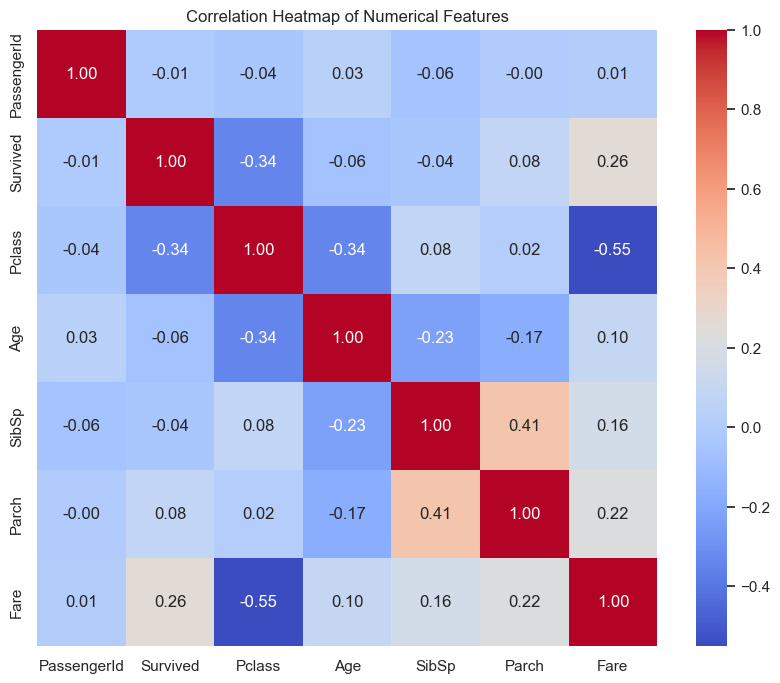

In [198]:
# Correlation heatmap of numerical features
numerical_cols = train.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 8))
sns.heatmap(train[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#### ANALYSIS
By Boxplot
i can say that there is a strong positive correlation between the fare paid by Titanic passengers and their likelihood of survival. Passengers who paid higher fares, likely those in higher-class accommodations, had a significantly higher median fare and a wider range of fares compared to those who did not survive.
and 

HISTOGRAM says that The bimodal nature of the age distribution suggests the presence of different passenger demographics on the Titanic, such as younger families and older, potentially wealthier individuals and in titanic there are more younger people. 

And PAIRPLOT says these following are correlated with higher survival rates are:

Younger age 
Higher fare
Travel in the 1st classlass

### 2.Data Pre Processing 
To perform data preprocessing for the Titanic dataset in the context of logistic regression, we will handle missing values and encode categorical variables. Here’s a structured approach to accomplish this:

In [414]:
# Loading then both datasets
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')
fulldata=pd.concat([train_data,test_data],sort=False)
# Displaying their initial information
print("Training Data Info:")
print(train_data.info())
print("\nTesting Data Info:")
print(test_data.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passe

#### a. Handling the missing values

In [417]:
# Filling missing Age with median
from sklearn.impute import SimpleImputer
age_imputer = SimpleImputer(strategy='median')
fulldata['Age'] = age_imputer.fit_transform(fulldata[['Age']])

In [419]:
fulldata['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())
# Filling missing Embarked with mode (most common value)
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

#### b. Encoding categorical variables.

In [422]:
label = LabelEncoder()

fulldata['Sex'] = label.fit_transform(fulldata['Sex'])
fulldata['Embarked'] = label.fit_transform(fulldata['Embarked'])

In [424]:
# here we are converting Categorical Variables into numeric values
# Converting 'Embarked' to numerical (C=0, Q=1, S=2)
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Droping the Cabin and Ticket columns due to high percentage of missing values from test & train datasets
fulldata.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

# Dropping Irrelevant Columns
# Dropoing PassengerId as it's not useful for model training
fulldata.drop(['PassengerId'], axis=1, inplace=True)

# Final DataFrame check
print("\nProcessed full Data:")
print(fulldata.head())


Processed full Data:
   Survived  Pclass                                               Name  Sex  \
0       0.0       3                            Braund, Mr. Owen Harris    1   
1       1.0       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   
2       1.0       3                             Heikkinen, Miss. Laina    0   
3       1.0       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
4       0.0       3                           Allen, Mr. William Henry    1   

    Age  SibSp  Parch     Fare  Embarked  
0  22.0      1      0   7.2500         2  
1  38.0      1      0  71.2833         0  
2  26.0      0      0   7.9250         2  
3  35.0      1      0  53.1000         2  
4  35.0      0      0   8.0500         2  


### 3. Model Building:

#### a) Building a logistic regression model using appropriate libraries (e.g., scikit-learn)
All Necessary libraries are used and we can see them in data exploratory section.

In [457]:
#selecting features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X=fulldata.loc[train['Survived'].notnull(),features]
y=fulldata.loc[train['Survived'].notnull(), 'Survived']

#### b. Training the model using the training data.

In [507]:
# Selecting features and target 
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = fulldata.loc[fulldata['Survived'].notnull(), features]
y = fulldata.loc[fulldata['Survived'].notnull(), 'Survived']

# Split into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and train logistic regression model
model = LogisticRegression(max_iter=710)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,710
,multi_class,'deprecated'


### 4. Model Evaluation

In [503]:
# --- Step 6: Evaluate ---
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("Precision:", precision_score(y_valid, y_pred))
print("Recall:", recall_score(y_valid, y_pred))
print("F1 Score:", f1_score(y_valid, y_pred))
print("ROC AUC Score:", roc_auc_score(y_valid, y_prob))

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC Score: 0.8823680823680823


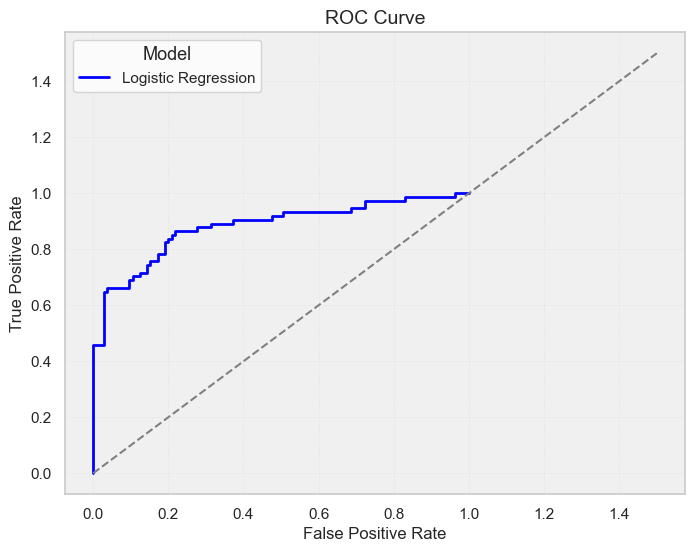

In [517]:
#  Ploting the ROC curve ---
fpr, tpr, _ = roc_curve(y_valid, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression', color='blue', linewidth=2)
plt.plot([0, 1.5], [0, 1.5], linestyle='--', color='grey')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.gca().set_facecolor('#f0f0f0')  # light gray background
plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.5)# Adding grid with style
plt.legend(title='Model', title_fontsize='13', fontsize='11')# Adding legend
plt.show()

This curve is well above the diagonal line throughout most of the range, which means the Logistic Regression model performs better than random guessing.

### 5. Interpretation:
#### a. Interpreting the coefficients of the logistic regression model.


In [538]:
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
})
print(coefficients.sort_values(by='Coefficient'))



    Feature  Coefficient
1       Sex    -2.598558
0    Pclass    -0.931257
3     SibSp    -0.294652
6  Embarked    -0.212704
4     Parch    -0.112554
2       Age    -0.030404
5      Fare     0.002563


The coefficients of the logistic regression model provide valuable insights into the relationships between features and the likelihood of survival.
#### b. Significance 
By interpreting these coefficients and evaluating the significance of each feature, we can better understand the factors that influenced survival on the Titanic. Features such as sex, passenger class, and fare are typically found to be significant predictors, while age may show varying effects depending on the context of the analysis.Higher fare prices and being female increased the chances of survival, while being older, having more family members on board, being in a lower class, and being male significantly decreased the odds of survival.

### 6. Deployment with Streamlit:
In this task, I am deploying my logistic regression model using Streamlit. This deployment can be done locally or online via Streamlit Share. This task includes creating a Streamlit app in Python that involves loading my trained model and setting up user inputs for predictions. 


#### Installation 

In [552]:
pip install streamlit


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [558]:
!python -m pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------------- ---------------------- 0.8/1.8 MB 2.2 MB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.8 MB 2.4 MB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1


#### Saving my trained model
My trained logistic regression model is saved using a library like joblib  and there we may use pickle if needed.

In [565]:
import joblib

# Assuming 'model' is my trained logistic regression model
joblib.dump(model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

#### Creating the Streamlit App
Creating a new Python file (for example  My_app.py) and adding the following code to set up my Streamlit application:

In [585]:
import streamlit as st
import pandas as pd

# Loading the trained model
model = joblib.load('logistic_regression_model.pkl')

# Function to make predictions
def predict_survival(fare, age, parch, embarked, sibsp, pclass, sex):
    # Create a DataFrame for the input features
    input_data = pd.DataFrame({
        'Fare': [fare],
        'Age': [age],
        'Parch': [parch],
        'Embarked': [embarked],
        'SibSp': [sibsp],
        'Pclass': [pclass],
        'Sex': [sex]
    })
    
    # Make prediction
    prediction = model.predict(input_data)
    return prediction[0]

# Streamlit app layout
st.title("Titanic Survival Prediction")

# User input fields
fare = st.number_input("Fare", min_value=0.0, value=0.0)
age = st.number_input("Age", min_value=0.0, value=0.0)
parch = st.number_input("Number of Parents/Children Aboard", min_value=0, value=0)
embarked = st.selectbox("Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)", ['C', 'Q', 'S'])
sibsp = st.number_input("Number of Siblings/Spouses Aboard", min_value=0, value=0)
pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.selectbox("Sex", ['male', 'female'])

# Button to predict
if st.button("Predict Survival"):
    prediction = predict_survival(fare, age, parch, embarked, sibsp, pclass, sex)
    if prediction == 1:
        st.success("The passenger is likely to survive.")
    else:
        st.error("The passenger is likely not to survive.")


#### this is localhost project so we can get it by the following command in our computer
C:\Users\dongr\anaconda3\Lib\site-packages\ipykernel_launcher.py

Next we have to run Run the Streamlit App by copying above code into cmd and then a browser will open.

### Interview Questions:
### 1. What is the difference between precision and recall?
Precision and recall are two important metrics used to evaluate the performance of a classification model, particularly in binary classification tasks.

Precision:
            Precision measures the accuracy of the positive predictions made by the model. It is the ratio of true positive predictions to the total number of positive predictions (both true positives and false positives).
            
precision= true positive / ( true positivve + false positive )

Recall (also known as Sensitivity or True Positive Rate):
            
Recall measures the ability of the model to find all the relevant cases (true positives) in the dataset. It is the ratio of true positive predictions to the total number of actual positive instances (both true positives and false negatives)

recall = true positive / (true positive + false negative) 

### 2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a statistical method used to estimate the skill of machine learning models. 
                Cross-validation involves partitioning the data into subsets, training the model on some subsets (training set), and validating it on the remaining subsets (validation set). The most common method is k-fold cross-validation, where the dataset is divided into k equal parts. The model is trained k times, each time using a different fold as the validation set and the remaining folds as the training set.

its important in 
 
        1) Model Evaluation  
        2) Better Use of Data 
        3) Detection of Overfitting
